In [3]:
import random
import numpy as np
trainX = np.load('tinyX.npy') # this should have shape (26344, 3, 64, 64)
trainY = np.load('tinyY.npy') 
testX = np.load('tinyX_test.npy') # (6600, 3, 64, 64)

In [4]:
counts = np.bincount(trainY)
counts

array([8000, 4000, 2080, 1040,  800,  710,  640,  581,  532,  492,  456,
        426,  400,  376,  355,  336,  320,  304,  290,  277,  266,  256,
        245,  236,  228,  220,  212,  206,  200,  193,  188,  182,  177,
        172,  168,  164,  160,  156,  152,  148])

In [64]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

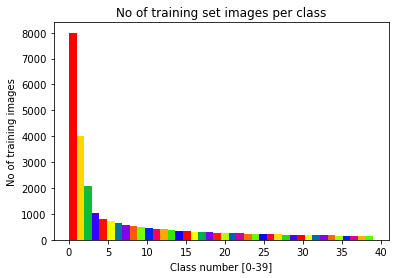

In [91]:
import numpy as n
import matplotlib.pyplot as plt

# Random gaussian data.
Ntotal = 1000
data = 0.05 * n.random.randn(Ntotal) + 0.5

cm = plt.cm.get_cmap('prism')

# Plot histogram.
n, bins, patches = plt.hist(trainY, 40)
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
plt.title("No of training set images per class")
plt.ylabel("No of training images")
plt.xlabel("Class number [0-39]")

plt.show()

In [8]:
for i,v in enumerate(counts):
    print(i," ",v)

0   8000
1   4000
2   2080
3   1040
4   800
5   710
6   640
7   581
8   532
9   492
10   456
11   426
12   400
13   376
14   355
15   336
16   320
17   304
18   290
19   277
20   266
21   256
22   245
23   236
24   228
25   220
26   212
27   206
28   200
29   193
30   188
31   182
32   177
33   172
34   168
35   164
36   160
37   156
38   152
39   148


In [5]:
counts.min()

148

In [3]:
def sync_shuffle(a, b): # syncronize shuffling of x and y
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    l1 = []
    l2 = []
    for i in p:
        l1.append(a[i])
        l2.append(b[i])
    return l1, l2

def split(X,Y,ratio=0.9): # Split into training and validation sets
    n=len(X)
    trainIndices=random.sample(range(0,n),int(n*ratio))
    testIndices=list(set(range(n))-set(trainIndices))
    # Split by train/test
    X_train=[]
    X_test=[]
    Y_train=[]
    Y_test=[]
    for i in trainIndices:
        X_train.append(X[i])
        Y_train.append(Y[i])
        
    for i in testIndices:
        X_test.append(X[i])
        Y_test.append(Y[i])

    assert len(trainIndices)+len(testIndices)==n
    return [X_train,X_test,Y_train,Y_test]

In [4]:
trainX, trainY = sync_shuffle(trainX, trainY)

In [5]:
X_train,X_test,Y_train,Y_test = split(trainX, trainY)

In [6]:
Y_train

[0,
 0,
 1,
 5,
 2,
 1,
 31,
 20,
 1,
 33,
 0,
 8,
 1,
 2,
 2,
 1,
 0,
 5,
 14,
 0,
 37,
 12,
 2,
 2,
 0,
 0,
 1,
 36,
 1,
 1,
 10,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 7,
 5,
 20,
 21,
 39,
 36,
 2,
 31,
 16,
 6,
 33,
 0,
 9,
 31,
 9,
 0,
 5,
 14,
 18,
 0,
 38,
 20,
 1,
 1,
 0,
 1,
 4,
 7,
 5,
 8,
 0,
 18,
 24,
 14,
 13,
 7,
 0,
 28,
 0,
 0,
 0,
 2,
 1,
 13,
 0,
 8,
 1,
 1,
 0,
 0,
 5,
 2,
 35,
 34,
 0,
 3,
 0,
 1,
 1,
 2,
 0,
 0,
 23,
 1,
 1,
 12,
 13,
 28,
 6,
 2,
 1,
 8,
 1,
 0,
 0,
 2,
 10,
 1,
 0,
 5,
 1,
 0,
 36,
 27,
 7,
 12,
 1,
 10,
 0,
 0,
 33,
 0,
 0,
 23,
 0,
 5,
 1,
 0,
 11,
 27,
 10,
 3,
 9,
 1,
 4,
 2,
 0,
 0,
 0,
 14,
 0,
 2,
 2,
 31,
 22,
 1,
 14,
 1,
 0,
 0,
 0,
 0,
 25,
 7,
 4,
 3,
 19,
 2,
 39,
 1,
 30,
 1,
 0,
 0,
 0,
 2,
 0,
 7,
 31,
 34,
 0,
 24,
 1,
 33,
 0,
 0,
 38,
 31,
 0,
 1,
 14,
 10,
 0,
 0,
 0,
 15,
 14,
 0,
 0,
 17,
 4,
 2,
 2,
 0,
 0,
 3,
 0,
 0,
 1,
 1,
 1,
 1,
 12,
 6,
 3,
 2,
 17,
 6,
 0,
 18,
 0,
 0,
 0,
 0,
 3,
 4,
 3,
 0,
 4,
 1,
 7,
 5,
 10,
 12,
 0,
 1

In [7]:
X_train[0][2]

array([[ 76,  80,  82, ...,  66, 171, 165],
       [ 72,  76,  78, ..., 110, 165, 102],
       [ 69,  72,  76, ..., 154, 140,  40],
       ..., 
       [110, 111, 113, ...,  41,  59,  76],
       [102, 102, 103, ...,  44,  63,  76],
       [ 93,  94,  96, ...,  46,  64,  72]], dtype=uint8)

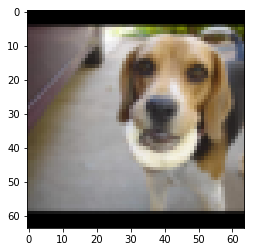

In [8]:
from matplotlib import pyplot as plt
plt.imshow(trainX[0].transpose(2,1,0))
plt.show()

In [9]:
import os
directory = "tf_files/tiny_imagenet"
if not os.path.exists(directory):
    os.makedirs(directory)
    
for i in range(0,40):
    directory = "".join(["tf_files/tiny_imagenet/",str(i)])
    if not os.path.exists(directory):
        os.makedirs(directory)

directory = "tf_files/test_tiny_imagenet"
if not os.path.exists(directory):
    os.makedirs(directory)

In [10]:
from matplotlib import pyplot as plt

for i in range(0,np.size(trainY)):
    type = trainY[i]
    path = "".join(["tf_files/tiny_imagenet/",str(trainY[i]),"/"])
    name = "".join([str(i),".jpg"])          
    fqfn = "".join([path,name])
    plt.imsave(fqfn, trainX[i].transpose(2,1,0), format='jpg')

In [12]:
for i in range(0,np.size(testX)):
    plt.imsave("".join(["tf_files/test_tiny_imagenet/",str(i).zfill(5),".jpg"]),testX[i].transpose(2,1,0), format='jpg')

IndexError: index 6600 is out of bounds for axis 0 with size 6600

In [21]:
[str(i).zfill(5)+".jpeg" for i in range(0,6600)]

['00000.jpeg',
 '00001.jpeg',
 '00002.jpeg',
 '00003.jpeg',
 '00004.jpeg',
 '00005.jpeg',
 '00006.jpeg',
 '00007.jpeg',
 '00008.jpeg',
 '00009.jpeg',
 '00010.jpeg',
 '00011.jpeg',
 '00012.jpeg',
 '00013.jpeg',
 '00014.jpeg',
 '00015.jpeg',
 '00016.jpeg',
 '00017.jpeg',
 '00018.jpeg',
 '00019.jpeg',
 '00020.jpeg',
 '00021.jpeg',
 '00022.jpeg',
 '00023.jpeg',
 '00024.jpeg',
 '00025.jpeg',
 '00026.jpeg',
 '00027.jpeg',
 '00028.jpeg',
 '00029.jpeg',
 '00030.jpeg',
 '00031.jpeg',
 '00032.jpeg',
 '00033.jpeg',
 '00034.jpeg',
 '00035.jpeg',
 '00036.jpeg',
 '00037.jpeg',
 '00038.jpeg',
 '00039.jpeg',
 '00040.jpeg',
 '00041.jpeg',
 '00042.jpeg',
 '00043.jpeg',
 '00044.jpeg',
 '00045.jpeg',
 '00046.jpeg',
 '00047.jpeg',
 '00048.jpeg',
 '00049.jpeg',
 '00050.jpeg',
 '00051.jpeg',
 '00052.jpeg',
 '00053.jpeg',
 '00054.jpeg',
 '00055.jpeg',
 '00056.jpeg',
 '00057.jpeg',
 '00058.jpeg',
 '00059.jpeg',
 '00060.jpeg',
 '00061.jpeg',
 '00062.jpeg',
 '00063.jpeg',
 '00064.jpeg',
 '00065.jpeg',
 '00066.jp

In [17]:
dir_name = "tf_files"

for filename in os.listdir(dir_name):

    # change this as you see fit
    image_path = dir_name + "/" + filename
    print(image_path)

tf_files/backups
tf_files/test_tiny_imagenet
tf_files/tf_files.zip
tf_files/tiny_imagenet
